# Задача
1.	Выполнить предобработку данных.
2.	Определить целевую переменную и задачу машинного обучения. Объяснить свой выбор.
3.	Выполнить решение задачи машинного обучения одним из методов. Объяснить почему был выбран именно этот метод, метрика и другие параметры решения.
4.	Проанализировать полученное решение с точки зрения точности, необходимости доработки и т.д.
5.	Сформулировать общие выводы по работе.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from prettytable import PrettyTable

import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score

# 1. Переработка данных
Создаем названия для столбцов по парам точек oXi, oYi и movement_type

In [2]:
columns = []
for i in range(1, 46):
    columns.append(f"{i}oX")
    columns.append(f"{i}oY")
columns.append("movement_type")

In [3]:
df = pd.read_csv("csv_dir/movement_libras.csv", names=columns)

# 2. Определение целевой переменной и определение залачи машинного обучения

In [4]:
df.head()

,1oX,1oY,2oX,2oY,3oX,3oY,4oX,4oY,5oX,5oY,...,41oY,42oX,42oY,43oX,43oY,44oX,44oY,45oX,45oY,movement_type
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


Анализируя значения датафрейма видно, что целевая переменная - последний столбец (movement_type), а задача машинного обучения - классификация
(Так же вся информация была указана в файле movement_libras_описание)
Number of Attributes: 90 numeric (double) and 1 for the class (integer)

Attribute Information:
   1. 1º coordinate abcissa
   2. 1º coordinate ordinate
   3. 2º coordinate abcissa
   4. 2º coordinate ordinate
   ...
   89. 45º coordinate abcissa
   90. 45º coordinate ordinate
   91. class:
		-- 1: curved swing
		-- 2: horizontal swing
		-- 3: vertical swing
		-- 4: anti-clockwise arc
		-- 5: clockwise arc
		-- 6: circle
		-- 7: horizontal straight-line
		-- 8: vertical straight-line
		-- 9: horizontal zigzag
		-- 10: vertical zigzag
		-- 11: horizontal wavy
		-- 12: vertical wavy
		-- 13: face-up curve
		-- 14: face-down curve
		-- 15: tremble


Проверим тип данных и наличие значений null или NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1oX            360 non-null    float64
 1   1oY            360 non-null    float64
 2   2oX            360 non-null    float64
 3   2oY            360 non-null    float64
 4   3oX            360 non-null    float64
 5   3oY            360 non-null    float64
 6   4oX            360 non-null    float64
 7   4oY            360 non-null    float64
 8   5oX            360 non-null    float64
 9   5oY            360 non-null    float64
 10  6oX            360 non-null    float64
 11  6oY            360 non-null    float64
 12  7oX            360 non-null    float64
 13  7oY            360 non-null    float64
 14  8oX            360 non-null    float64
 15  8oY            360 non-null    float64
 16  9oX            360 non-null    float64
 17  9oY            360 non-null    float64
 18  10oX      

In [6]:
y = df['movement_type']
X = df.drop('movement_type', axis=1)

Найдем максимальное, минимальное значения и среднее значения точек, чтобы понять о необходимости нормализации данных

In [7]:
table_1 = PrettyTable()

In [8]:
table_1.field_names = ['Метрика', 'Значение']
table_1.add_row(["Максимальное значение:", max(X.iloc[0])])
table_1.add_row(["Минимальное значение:", min(X.iloc[0])])
table_1.add_row(["Среднее значение:", np.mean(X.iloc[0])])

In [9]:
table_1

Метрика,Значение
Максимальное значение:,0.87963
Минимальное значение:,0.26112
Среднее значение:,0.4870105555555555


# 3.1. Выбор метода машинного обучения
(Методы для рассмотрения: LogisticRegression, SVC, KNeighborsClassifier, RandomForestClassifier)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.206, random_state=1, stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
predict_lr = lr_model.predict(X_test)

In [14]:
print(classification_report(y_test, predict_lr))
lr_metrics = [precision_score(y_test, predict_lr, average='macro'), recall_score(y_test, predict_lr, average='macro'), accuracy_score(y_test, predict_lr), f1_score(y_test, predict_lr, average='macro')]

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.60      0.60      0.60         5
           3       1.00      1.00      1.00         5
           4       0.75      0.60      0.67         5
           5       1.00      0.60      0.75         5
           6       0.60      0.60      0.60         5
           7       0.71      1.00      0.83         5
           8       0.57      0.80      0.67         5
           9       0.60      0.60      0.60         5
          10       0.00      0.00      0.00         5
          11       0.25      0.20      0.22         5
          12       0.62      1.00      0.77         5
          13       0.50      0.60      0.55         5
          14       0.56      1.00      0.71         5
          15       1.00      0.20      0.33         5

    accuracy                           0.64        75
   macro avg       0.64      0.64      0.61        75
weighted avg       0.64   

In [15]:
from sklearn import svm

In [16]:
svc_model = svm.SVC(probability=True)
svc_model.fit(X_train, y_train)
predict_svc = svc_model.predict(X_test)

In [17]:
print(classification_report(y_test, predict_svc))
svc_metrics = [precision_score(y_test, predict_svc, average='macro'), recall_score(y_test, predict_svc, average='macro'), accuracy_score(y_test, predict_svc), f1_score(y_test, predict_svc, average='macro')]

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       0.60      0.60      0.60         5
           9       0.83      1.00      0.91         5
          10       1.00      0.60      0.75         5
          11       0.50      0.60      0.55         5
          12       0.67      0.80      0.73         5
          13       0.75      0.60      0.67         5
          14       1.00      1.00      1.00         5
          15       0.80      0.80      0.80         5

    accuracy                           0.81        75
   macro avg       0.84      0.81      0.81        75
weighted avg       0.84   

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(X_train, y_train)
predict_knn = knn_model.predict(X_test)

In [20]:
print(classification_report(y_test, predict_knn))
knn_metrics = [precision_score(y_test, predict_knn, average='macro'), recall_score(y_test, predict_knn, average='macro'), accuracy_score(y_test, predict_knn), f1_score(y_test, predict_knn, average='macro')]

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.45      1.00      0.62         5
           8       0.40      0.40      0.40         5
           9       0.83      1.00      0.91         5
          10       1.00      0.40      0.57         5
          11       0.67      0.80      0.73         5
          12       0.80      0.80      0.80         5
          13       1.00      0.40      0.57         5
          14       1.00      1.00      1.00         5
          15       1.00      0.80      0.89         5

    accuracy                           0.77        75
   macro avg       0.85      0.77      0.76        75
weighted avg       0.85   

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rfc_model.fit(X_train, y_train)
predict_rfc = rfc_model.predict(X_test)

In [22]:
print(classification_report(y_test, predict_rfc))
rfc_metrics = [precision_score(y_test, predict_rfc, average='macro'), recall_score(y_test, predict_rfc, average='macro'), accuracy_score(y_test, predict_rfc), f1_score(y_test, predict_rfc, average='macro')]

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         5
           4       0.80      0.80      0.80         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         5
          10       1.00      0.60      0.75         5
          11       0.57      0.80      0.67         5
          12       0.71      1.00      0.83         5
          13       0.67      0.40      0.50         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5

    accuracy                           0.85        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.87   

## 3.1 Выбор лучшего метода

In [23]:
table_2 = PrettyTable()
table_2.field_names = ["Метод", "precision_score", "recall_score", "accuracy_score", "average"]

In [24]:
table_2.add_row(["LogisticRegression", *lr_metrics])
table_2.add_row(["SVC", *svc_metrics])
table_2.add_row(["KNeighborsClassifier", *knn_metrics])
table_2.add_row(["RandomForestClassifier", *rfc_metrics])

In [25]:
table_2

Метод,precision_score,recall_score,accuracy_score,average
LogisticRegression,0.6377513227513227,0.64,0.64,0.6067462167462166
SVC,0.8385714285714285,0.8133333333333334,0.8133333333333334,0.8128619528619527
KNeighborsClassifier,0.8473400673400673,0.7733333333333335,0.7733333333333333,0.7619745069745071
RandomForestClassifier,0.8733333333333332,0.8533333333333334,0.8533333333333334,0.8487542087542087


Сравнивая полученные значения можно было бы выбрать метод RandomForestClassifier, но в силу не большой вариативности оптимизации гиперпараметров можно сказать, что при их изменении полученные метрики не получится значительно улучшить. В свою очередь метод LogisticRegression показал самые худшие результаты, поэтому подробнее рассмотрим два оставшихся метода KNeighborsClassifier и SVC в которых необходимы доработки для лучших показателей.

# 4 Доработки и выбор из двух методов SVC, KNeighborsClassifier

## 4.1 SVC

In [26]:
train_scores, valid_scores = validation_curve(
  svc_model,
  X,
  y,
  param_name='C',
  param_range=range(1, 15),
  scoring="roc_auc_ovo",
  cv=5
)

Text(0, 0.5, 'roc_auc_ovo')

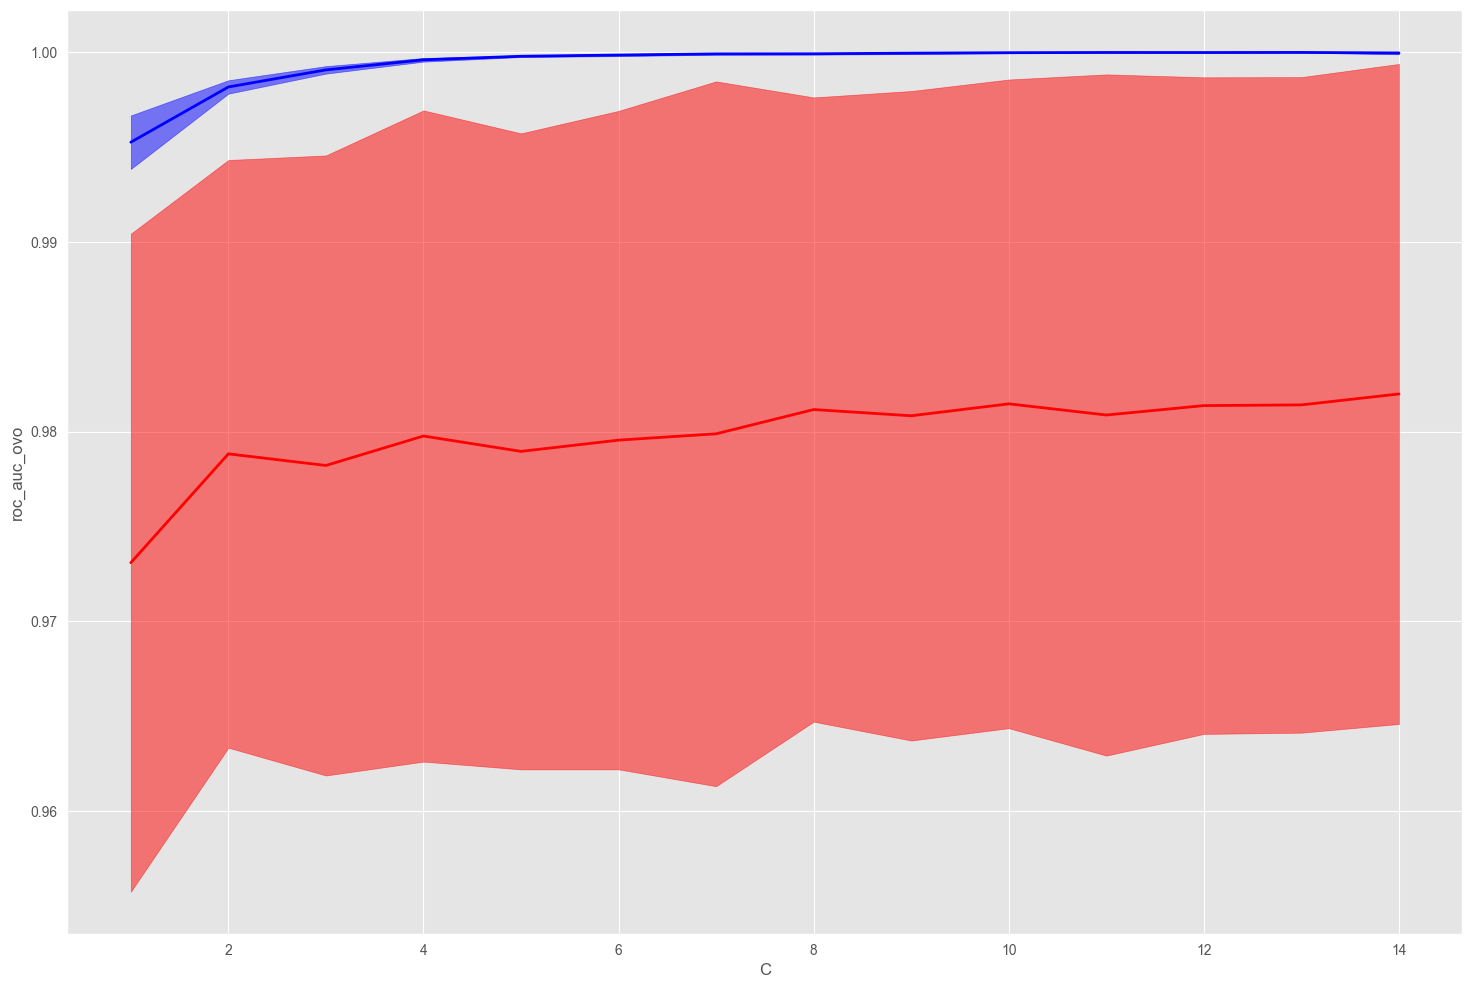

In [27]:
    train_score_mean = train_scores.mean(axis=1)
    train_score_std = train_scores.std(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)

    plt.fill_between(range(1, 15), train_score_mean-train_score_std, train_score_mean + train_score_std, color='b',
                        interpolate=True, alpha=0.5)
    plt.fill_between(range(1, 15), valid_scores_mean-valid_scores_std, valid_scores_mean + valid_scores_std, color='r',
                        interpolate=True, alpha=0.5)

    plt.plot(range(1, 15), train_score_mean, c='b', lw=2)
    plt.plot(range(1, 15), valid_scores_mean, c='r', lw=2)

    plt.xlabel('C')
    plt.ylabel("roc_auc_ovo")

In [28]:
svc_model_params = svc_model.get_params()
svc_tuned_params = {}
for k, v in svc_model_params.items():
    svc_tuned_params[k] = [v]

svc_tuned_params['C'] = range(1, 15)
svc_tuned_params['kernel'] = ['linear', 'rbf', 'poly', 'sigmoid']
svc_tuned_params['gamma'] = ['scale', 'auto']
svc_tuned_params

{'C': range(1, 15),
 'break_ties': [False],
 'cache_size': [200],
 'class_weight': [None],
 'coef0': [0.0],
 'decision_function_shape': ['ovr'],
 'degree': [3],
 'gamma': ['scale', 'auto'],
 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
 'max_iter': [-1],
 'probability': [True],
 'random_state': [None],
 'shrinking': [True],
 'tol': [0.001],
 'verbose': [False]}

In [29]:
clf = GridSearchCV(svc_model, svc_tuned_params, cv=5, n_jobs=-1, scoring='roc_auc_ovo')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': range(1, 15), 'break_ties': [False],
                         'cache_size': [200], 'class_weight': [None],
                         'coef0': [0.0], 'decision_function_shape': ['ovr'],
                         'degree': [3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [-1], 'probability': [True],
                         'random_state': [None], 'shrinking': [True],
                         'tol': [0.001], 'verbose': [False]},
             scoring='roc_auc_ovo')

In [30]:
svc_best_params = clf.best_params_
print('Used params:', svc_best_params)

Used params: {'C': 11, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [31]:
svc_best_params_model = svm.SVC(**svc_best_params)
svc_best_params_model.fit(X_train, y_train)
svc_predict_best_params = svc_best_params_model.predict(X_test)
print(classification_report(y_test, svc_predict_best_params))
svc_metrics = [precision_score(y_test, svc_predict_best_params, average='macro'), recall_score(y_test, svc_predict_best_params, average='macro'), accuracy_score(y_test, svc_predict_best_params), f1_score(y_test, svc_predict_best_params, average='macro')]

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.71      1.00      0.83         5
           9       0.83      1.00      0.91         5
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         5
          12       0.80      0.80      0.80         5
          13       1.00      0.60      0.75         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.92   

## 4.2 KNN

In [32]:
train_scores, valid_scores = validation_curve(
  knn_model,
  X,
  y,
  param_name="n_neighbors",
  param_range=range(1,15),
  scoring = 'f1_macro',
  cv=5
)

Text(0, 0.5, 'f1_macro')

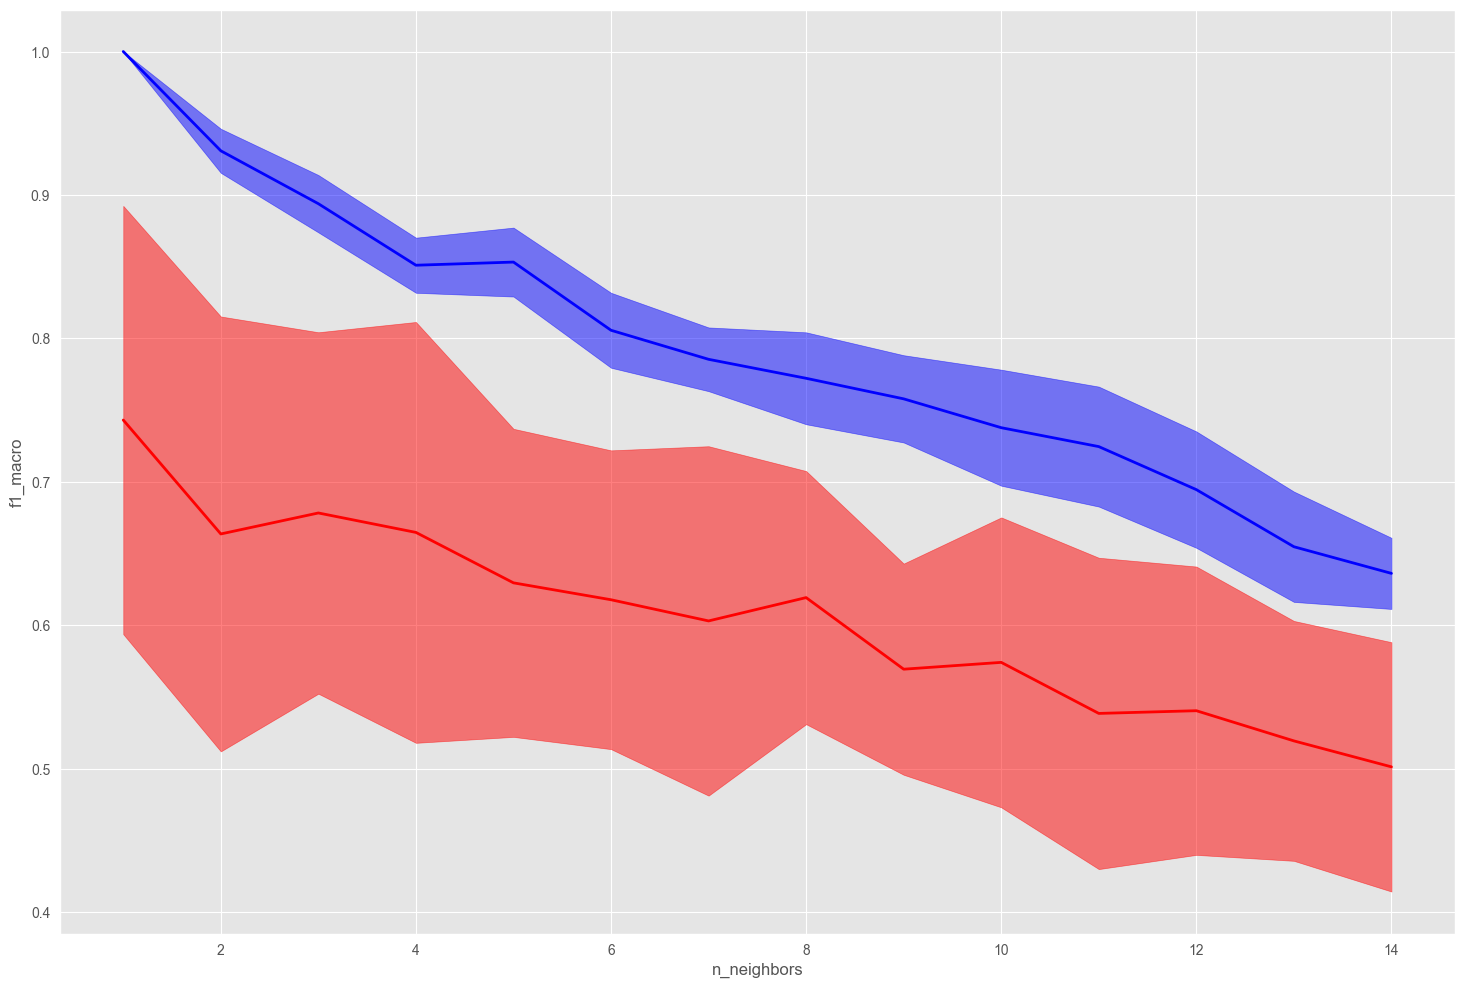

In [33]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1, 15), train_score_mean-train_score_std, train_score_mean + train_score_std, color='b',
                    interpolate=True, alpha=0.5)
plt.fill_between(range(1, 15), valid_scores_mean-valid_scores_std, valid_scores_mean + valid_scores_std, color='r',
                    interpolate=True, alpha=0.5)

plt.plot(range(1, 15), train_score_mean, c='b', lw=2)
plt.plot(range(1, 15), valid_scores_mean, c='r', lw=2)

plt.xlabel('n_neighbors')
plt.ylabel("f1_macro")

In [34]:
knn_model_params = knn_model.get_params()
knn_tuned_params = {}

for k, v in knn_model_params.items():
    knn_tuned_params[k] = [v]

knn_tuned_params['n_neighbors'] = range(1, 30)
knn_tuned_params['weights'] = ['distance', 'uniform', ]
knn_tuned_params['algorithm'] = ['ball_tree', 'kd_tree', 'brute', ]
knn_tuned_params['metric'] = ['euclidean', 'minkowski', ]

clf = GridSearchCV(KNeighborsClassifier(), knn_tuned_params, cv=5, scoring="f1_macro", n_jobs=-1)
clf.fit(X_train, y_train)
knn_best_params = clf.best_params_
knn_tuned_params

{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30],
 'metric': ['euclidean', 'minkowski'],
 'metric_params': [None],
 'n_jobs': [-1],
 'n_neighbors': range(1, 30),
 'p': [2],
 'weights': ['distance', 'uniform']}

In [35]:
knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train, y_train)
knn_predict_best_params = knn_best_model.predict(X_test)

In [36]:
print('Used params:', knn_best_params)
print('Evaluation:\n', classification_report(y_test, knn_predict_best_params))
knn_metrics = [precision_score(y_test, knn_predict_best_params, average='macro'), recall_score(y_test, knn_predict_best_params, average='macro'), accuracy_score(y_test, knn_predict_best_params), f1_score(y_test, knn_predict_best_params, average='macro')]

Used params: {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Evaluation:
               precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       0.83      1.00      0.91         5
          10       0.80      0.80      0.80         5
          11       0.71      1.00      0.83         5
          12       0.80      0.80      0.80         5
          13       1.00      0.60      0.75         5
          14       1.00      1.00      1.00         5
          

In [37]:
table_3 = PrettyTable()
table_3.field_names = ["Метод", "precision_score", "recall_score", "accuracy_score", "average"]
table_3.add_row(["SVC", *svc_metrics])
table_3.add_row(["KNeighborsClassifier", *knn_metrics])

In [38]:
table_3

Метод,precision_score,recall_score,accuracy_score,average
SVC,0.9209523809523811,0.9066666666666667,0.9066666666666666,0.9051515151515152
KNeighborsClassifier,0.9209523809523811,0.9066666666666667,0.9066666666666666,0.9051515151515152


# 5. Выводы

Анализируя полученные метрики для оценки качества работы методов можно сказать, методы показывают хорошие результаты причем одинаковые, за исключением жестов под номерами 8 и 11. Так же неплохие результаты были полученны с помощью метода RandomForestClassifier, но всё же они были не самыми лучшими.

После исследования датасета movement_libras.csv можно предположить область применения данных.
Из названия датасета и приложенного к нему описания можно сказать, что данные описывают движения руки человека при разговоре на
бразильском языке жестов.
Машинное обучение на этом датасете можно использовать для создания компьтерного зрения и перевода языка жестов в текс или речь,
что может помочь людям с ограниченными возможностями общаться с людьми не знающими язык жестов.